In [1]:
#IMPORTAMOS LOS FRAMEWORKS NECESARIOS PARA RESOLVER EL PROYECTO

import pandas as pd
import json
import ast
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import datetime
from datetime import datetime

In [2]:
#Se usa para poder observar el dataframe completo
pd.options.display.max_columns= None

In [3]:
# Se converten los 3 datasets en dataframes, primero se desanida todo el código porque vienen en una lista en formato .json

#Creo una lista vacía para almacenar los datos del archivo JSON
juegos = [] 
#Abro el archivo JSON en modo lectura, y con el bucle for se lee línea por línea
with open('output_steam_games.json') as file:
    for line in file: 
        data = json.loads(line)
        #Añadimos cada objeto a la lista creada en un principio
        juegos.append(data)
        #Se crea el dataframe con los datos de la lista
df_juegos = pd.DataFrame(juegos)
print(df_juegos.shape)


(120445, 13)


In [4]:
#Usamos herraminentas para poder entender el contenido de los dataframes
df_juegos.head()
#df_juegos.columns
#df_juegos.info()
#df_juegos.describe()
#print(df_juegos.shape)


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Eliminamos los datos nulos encontrados en el dataframe df_juegos

df_juegos.dropna(inplace=True)
#Verificamos que si fueron borrados
#df_juegos.info()
print(df_juegos.shape)

(22530, 13)


In [6]:

resenias = []
with open('australian_user_reviews.json', 'r', encoding = 'utf-8') as file:
    for line in file.readlines():
        resenias.append(ast.literal_eval(line))
df_reviews = pd.DataFrame(resenias)
print(df_reviews.shape)


(25799, 3)


In [7]:
#df_reviews.head()
#df_reviews.columns
#df_reviews.info()
#df_reviews.describe()

In [8]:
items = []
with open('australian_users_items.json', 'r', encoding = 'utf-8') as file:
    for line in file.readlines():
        items.append(ast.literal_eval(line))

df_items = pd.DataFrame(items)
print(df_reviews.shape)

(25799, 3)


In [9]:
df_items.head()
#df_items.columns
#df_items.info()
#df_items.describe()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


In [10]:
#Normalizamos los dataframes
#Desanidamos las columnas 

juegos_exploded = df_juegos.explode('genres')
juegos_normalized = pd.json_normalize(juegos_exploded['genres'])
juegos_exploded.reset_index(drop=True, inplace=True)
juegos_normalized.reset_index(drop=True, inplace=True)

df_juegos_final = pd.concat([df_juegos, juegos_normalized], axis=1, sort=False).reset_index(drop=True)
#print(df_juegos_final.shape)
#print(df_juegos.shape)
print(juegos_normalized.shape)


(55612, 0)


In [11]:
df_juegos_final

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域
4,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,False,772540,Trickjump Games Ltd
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print(juegos_exploded.isnull().sum())

publisher       0
genres          0
app_name        0
title           0
url             0
release_date    0
tags            0
reviews_url     0
specs           0
price           0
early_access    0
id              0
developer       0
dtype: int64


In [13]:
#Elimino columnas que no son necesarias

df_juegos_final.drop(columns=['publisher'], inplace=True)
df_juegos_final.drop(columns=['url'], inplace=True)
df_juegos_final.drop(columns=['tags'], inplace=True)
df_juegos_final.drop(columns=['specs'], inplace=True)
df_juegos_final.drop(columns=['early_access'], inplace=True)
df_juegos_final.drop(columns=['reviews_url'], inplace=True)

In [14]:
#Elimino valores Nulos

df_juegos_final.dropna(inplace=True)

In [15]:
print(df_juegos_final.isnull().sum())

genres          0
app_name        0
title           0
release_date    0
price           0
id              0
developer       0
dtype: int64


In [16]:
print(df_juegos_final.shape)

(22530, 7)


In [17]:
#Normalizamos los dataframes
#Desanidamos las columnas 

dfresenias_exploded = df_reviews.explode('reviews')
dfresenias_normalized = pd.json_normalize(dfresenias_exploded['reviews'])
dfresenias_exploded.reset_index(drop=True, inplace=True)
dfresenias_normalized.reset_index(drop=True, inplace=True)

dfresenias_final= pd.concat([dfresenias_exploded.drop('reviews', axis=1), dfresenias_normalized], axis=1)
#print(dfresenias_final.shape)
print(dfresenias_final.shape)

(59333, 9)


In [18]:
dfresenias_final

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...,...
59328,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...
59329,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
59330,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
59331,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D


In [19]:
#Elimino columnas que no son necesarias

dfresenias_final.drop(columns=['user_url'], inplace=True)
dfresenias_final.drop(columns=['funny'], inplace=True)
dfresenias_final.drop(columns=['last_edited'], inplace=True)
dfresenias_final.drop(columns=['helpful'], inplace=True)

In [20]:
#Elimino valores Nulos
dfresenias_final.dropna(inplace=True)


In [21]:
print(dfresenias_final.isnull().sum())

user_id      0
posted       0
item_id      0
recommend    0
review       0
dtype: int64


In [22]:
#Normalizamos los dataframes
#Desanidamos las columnas 

df_items_exploded = df_items.explode('items')
df_items_normalized = pd.json_normalize(df_items_exploded['items'])
df_items_exploded.reset_index(drop=True, inplace=True)
df_items_normalized.reset_index(drop=True, inplace=True)

dfitems_final= pd.concat([df_items.drop('items', axis=1), df_items_normalized], axis=1)
print(dfitems_final.shape)

(5170015, 8)


In [23]:
dfitems_final

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277.0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6.0,0.0
1,js41637,888.0,76561198035864385,http://steamcommunity.com/id/js41637,20,Team Fortress Classic,0.0,0.0
2,evcentric,137.0,76561198007712555,http://steamcommunity.com/id/evcentric,30,Day of Defeat,7.0,0.0
3,Riot-Punch,328.0,76561197963445855,http://steamcommunity.com/id/Riot-Punch,40,Deathmatch Classic,0.0,0.0
4,doctr,541.0,76561198002099482,http://steamcommunity.com/id/doctr,50,Half-Life: Opposing Force,0.0,0.0
...,...,...,...,...,...,...,...,...
5170010,NaN,NaN,NaN,NaN,373330,All Is Dust,0.0,0.0
5170011,NaN,NaN,NaN,NaN,388490,One Way To Die: Steam Edition,3.0,3.0
5170012,NaN,NaN,NaN,NaN,521570,You Have 10 Seconds 2,4.0,4.0
5170013,NaN,NaN,NaN,NaN,519140,Minds Eyes,3.0,3.0


In [24]:
#Elimino columnas que no son necesarias

dfitems_final.drop(columns=['user_url'], inplace=True)
dfitems_final.drop(columns=['playtime_2weeks'], inplace=True)
dfitems_final.drop(columns=['steam_id'], inplace=True)
dfitems_final.drop(columns=['items_count'], inplace=True)

In [25]:
#Elimino valores Nulos
dfitems_final.dropna(inplace=True)

In [26]:
print(dfitems_final.isnull().sum())

user_id             0
item_id             0
item_name           0
playtime_forever    0
dtype: int64


In [27]:
# Descargamos los recursos necesarios para NLTK (solo es necesario la primera vez)

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Elena\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:
#Se crea el analizador de sentimientos

sia= SentimentIntensityAnalyzer()

In [29]:
#Función para aplicar el análisis de sentimiento

def analyze_sentiment_or_default(text):
    if isinstance(text,str):
        compound_score = sia.polarity_scores(text)['compound']
        if compound_score >= 0.05:
            return 2
        elif compound_score <= -0.05:
            return 0
        else:
            return 1
    else:
        return 1

In [30]:
#Aplicamos el análisis sobre la columna 'review' y creamos la columna 'sentiment_analysis', que va a reemplazar a la columna review.

dfresenias_final['sentiment_analysis']= dfresenias_final['review'].apply(analyze_sentiment_or_default)
dfresenias_final.drop(columns=['review'], inplace=True)

In [31]:
dfresenias_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59305 entries, 0 to 59332
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             59305 non-null  object
 1   posted              59305 non-null  object
 2   item_id             59305 non-null  object
 3   recommend           59305 non-null  object
 4   sentiment_analysis  59305 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.7+ MB


In [32]:
#Se guardan los datasets provisionales para hacer las funciones

df_juegos_final.to_csv('juegos_funciones.csv')
dfitems_final.to_csv('items_funciones.csv')
dfresenias_final.to_csv('resenias_funciones.csv')

In [33]:
#Abrimos los archivos csv para utilizarlos

df_juegos = pd.read_csv('juegos_funciones.csv')
df_items = pd.read_csv('items_funciones.csv')
df_resenias = pd.read_csv('resenias_funciones.csv')

In [34]:
df_juegos.columns


Index(['Unnamed: 0', 'genres', 'app_name', 'title', 'release_date', 'price',
       'id', 'developer'],
      dtype='object')

In [35]:
df_items.columns

Index(['Unnamed: 0', 'user_id', 'item_id', 'item_name', 'playtime_forever'], dtype='object')

In [36]:
df_resenias.columns

Index(['Unnamed: 0', 'user_id', 'posted', 'item_id', 'recommend',
       'sentiment_analysis'],
      dtype='object')

In [37]:
#Se eliminan las columnas  con los índices al momento de crear el nuevo csv
df_resenias.drop(columns=['Unnamed: 0'], inplace=True)
df_items.drop(columns=['Unnamed: 0'], inplace=True)
df_juegos.drop(columns=['Unnamed: 0'], inplace=True)

In [38]:
#Vemos si hay valores nulos en cada dataframe
#print(df_juegos.isnull().sum()) 
#print(df_resenias.isnull().sum()) 
#print(df_items.isnull().sum()) 

In [131]:
#verifico los valores de la columna price
df_juegos[df_juegos['price'] == 'Free To Play']

,genres,app_name,title,price,item_id,developer,release_year
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,Free To Play,643980,Secret Level SRL,2018
1607,"['Adventure', 'Free to Play', 'Indie', 'Massiv...",King’s Bounty: Legions,King’s Bounty: Legions,Free To Play,235400,Nival,2013
1807,"['Free to Play', 'Indie', 'Massively Multiplay...",Villagers and Heroes,Villagers and Heroes,Free To Play,263540,Mad Otter Games,2014
2098,"['Adventure', 'Casual', 'Free to Play', 'Indie...",Velvet Sundown,Velvet Sundown,Free To Play,307290,Tribe Studios,2014
2228,"['Casual', 'Free to Play', 'Indie', 'Massively...",My Lands: Black Gem Hunting,My Lands: Black Gem Hunting,Free To Play,290730,"Gravvit Ltd,Forbes Consult Ltd",2014
...,...,...,...,...,...,...,...
19434,"['Free to Play', 'Indie', 'Massively Multiplay...",Darkwind: War on Wheels,Darkwind: War on Wheels,Free To Play,295710,Psychic Software,2014
19470,"['Indie', 'RPG']",Always Sometimes Monsters Demo,Always Sometimes Monsters Demo,Free To Play,317760,Vagabond Dog,2014
19564,"['Adventure', 'Free to Play', 'Indie']",Only If,Only If,Free To Play,298260,Creability,2014
21379,"['Action', 'Free to Play', 'Indie', 'Strategy']",Awesomenauts - the 2D moba,Awesomenauts - the 2D moba,Free To Play,204300,Ronimo Games,2012


In [135]:
#Cambio los valores "Free To Play" y "Free to Play" por "0"
df_juegos['price'] = df_juegos['price'].replace('Free To Play', 0)
df_juegos['price'] = df_juegos['price'].replace('Free to Play', 0)
df_juegos['price']=="str"

0        False
1        False
2        False
3        False
4        False
         ...  
22525    False
22526    False
22527    False
22528    False
22529    False
Name: price, Length: 22496, dtype: bool

In [136]:
df_juegos

,genres,app_name,title,price,item_id,developer,release_year
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,0,643980,Secret Level SRL,2018
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,0,670290,Poolians.com,2017
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,0.99,767400,彼岸领域,2017
4,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,Battle Royale Trainer,3.99,772540,Trickjump Games Ltd,2018
...,...,...,...,...,...,...,...
22525,"['Action', 'Adventure', 'Casual', 'Indie']",Kebab it Up!,Kebab it Up!,1.99,745400,Bidoniera Games,2018
22526,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,Colony On Mars,1.99,773640,"Nikita ""Ghost_RUS""",2018
22527,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,LOGistICAL: South Africa,4.99,733530,Sacada,2018
22528,"['Indie', 'Racing', 'Simulation']",Russian Roads,Russian Roads,1.99,610660,Laush Dmitriy Sergeevich,2018


In [ ]:
#Transforma a la columna release_date a datatime
df_juegos['release_date'] = pd.to_datetime(df_juegos['release_date'], errors='coerce')

#Crea una nueva columna con el valor de año de release_date
df_juegos["release_year"] = (df_juegos["release_date"].dt.strftime("%Y"))

#Cambia la columna release_year a int
df_juegos.dropna(inplace=True)
df_juegos["release_year"] = df_juegos["release_year"].astype('int')#, errors="ignore")

#Borra la columna release_date, ya que no sera necesaria
df_juegos.drop(['release_date'] , axis=1, inplace=True)

In [138]:
#Cambio de nombre la columna id para luego poder hacer el merge
df_juegos = df_juegos.rename(columns={"id": "item_id"})

In [139]:
#Elimino los valores que tengan en platime_forever 0.0
df_items=df_items[df_items['playtime_forever'] != 0.0]

In [140]:
df_juegos

,genres,app_name,title,price,item_id,developer,release_year
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,0,643980,Secret Level SRL,2018
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,0,670290,Poolians.com,2017
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,0.99,767400,彼岸领域,2017
4,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,Battle Royale Trainer,3.99,772540,Trickjump Games Ltd,2018
...,...,...,...,...,...,...,...
22525,"['Action', 'Adventure', 'Casual', 'Indie']",Kebab it Up!,Kebab it Up!,1.99,745400,Bidoniera Games,2018
22526,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,Colony On Mars,1.99,773640,"Nikita ""Ghost_RUS""",2018
22527,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,LOGistICAL: South Africa,4.99,733530,Sacada,2018
22528,"['Indie', 'Racing', 'Simulation']",Russian Roads,Russian Roads,1.99,610660,Laush Dmitriy Sergeevich,2018


In [141]:
df_items

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-Strike,6.0
2,evcentric,30,Day of Defeat,7.0
8,maplemage,300,Day of Defeat: Source,4733.0
9,Wackky,240,Counter-Strike: Source,1853.0
10,corrupted_soul,3830,Psychonauts,333.0
...,...,...,...,...
88171,76561198323066619,202090,Magicka: Wizard Wars,1501.0
88172,76561198326700687,239220,The Mighty Quest For Epic Loot,2374.0
88173,XxLaughingJackClown77xX,257730,Infinity Wars - Animated Trading Card Game,654.0
88174,76561198329548331,227220,Sang-Froid - Tales of Werewolves,2973.0


In [142]:
#Uno los df juegos e items por medio de la columna "item_id" con un Merge 

juegos_items= pd.merge(df_juegos, df_items, on='item_id')

In [143]:
#Uno los df juegos y resenias por medio de la columna "item_id" con un Merge 
juegos_resenias= pd.merge(df_juegos,df_resenias,on='item_id')

In [144]:
#Verifico valores nulos
juegos_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48889 entries, 0 to 48888
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            48889 non-null  object 
 1   app_name          48889 non-null  object 
 2   title             48889 non-null  object 
 3   price             48889 non-null  object 
 4   item_id           48889 non-null  int64  
 5   developer         48889 non-null  object 
 6   release_year      48889 non-null  int32  
 7   user_id           48889 non-null  object 
 8   item_name         48889 non-null  object 
 9   playtime_forever  48889 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 3.5+ MB


In [145]:
#Verifico valores nulos
juegos_resenias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48832 entries, 0 to 48831
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   genres              48832 non-null  object
 1   app_name            48832 non-null  object
 2   title               48832 non-null  object
 3   price               48832 non-null  object
 4   item_id             48832 non-null  int64 
 5   developer           48832 non-null  object
 6   release_year        48832 non-null  int32 
 7   user_id             48832 non-null  object
 8   posted              48832 non-null  object
 9   recommend           48832 non-null  bool  
 10  sentiment_analysis  48832 non-null  int64 
dtypes: bool(1), int32(1), int64(2), object(7)
memory usage: 3.6+ MB


In [146]:
#Guardo los nuevos datos definitivos para las funciones en archivos .csv
juegos_resenias.to_csv('df_f3_4_5.csv')
juegos_items.to_csv('df_f1_2.csv')

In [31]:
#Abro el archivo cvs que voy a usar y lo convierto e un dataframe
df_f1_2= pd.read_csv('df_f1_2.csv')



In [32]:
df_f1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48889 entries, 0 to 48888
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        48889 non-null  int64  
 1   genres            48889 non-null  object 
 2   app_name          48889 non-null  object 
 3   title             48889 non-null  object 
 4   price             48889 non-null  object 
 5   item_id           48889 non-null  int64  
 6   developer         48889 non-null  object 
 7   release_year      48889 non-null  int64  
 8   user_id           48889 non-null  object 
 9   item_name         48889 non-null  object 
 10  playtime_forever  48889 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 4.1+ MB


In [37]:
df_f1_2

,genres,app_name,title,price,item_id,developer,release_year,user_id,item_name,playtime_forever
0,"Action, Indie, Racing",Carmageddon Max Pack,Carmageddon Max Pack,9.99,282010,Stainless Games Ltd,1997,76561198063896904,Carmageddon Max Pack,5.0
1,"Action, Indie, Racing",Carmageddon Max Pack,Carmageddon Max Pack,9.99,282010,Stainless Games Ltd,1997,76561198091362266,Carmageddon Max Pack,13.0
2,Action,Half-Life,Half-Life,9.99,70,Valve,1998,DingarooEF,Half-Life,108.0
3,Action,Half-Life,Half-Life,9.99,70,Valve,1998,76561197986552406,Half-Life,32.0
4,Action,Half-Life,Half-Life,9.99,70,Valve,1998,76561198103927245,Half-Life,10.0
...,...,...,...,...,...,...,...,...,...,...
48884,Action,Counter-Strike: Condition Zero,Counter-Strike: Condition Zero,9.99,80,Valve,2004,76561198096901357,Counter-Strike: Condition Zero,1.0
48885,Action,Counter-Strike: Condition Zero,Counter-Strike: Condition Zero,9.99,80,Valve,2004,76561198104259586,Counter-Strike: Condition Zero,1.0
48886,Action,Counter-Strike: Condition Zero,Counter-Strike: Condition Zero,9.99,80,Valve,2004,RaxonTV,Counter-Strike: Condition Zero,194.0
48887,Action,Counter-Strike: Condition Zero,Counter-Strike: Condition Zero,9.99,80,Valve,2004,pengwig,Counter-Strike: Condition Zero,204.0


In [34]:
df_f1_2.drop(columns=['Unnamed: 0'], inplace=True)

In [36]:
#Elimino caracteres innecesarios en la columna 'genres'
df_f1_2['genres'] = df_f1_2['genres'].apply(lambda x: x.replace("'", "").strip("[]"))

In [38]:
#Abro el archivo con el que voy a trabajar en las funciones 4 y 5

df_f3_4_5= pd.read_csv('df_f3_4_5.csv')

In [44]:
df_f3_4_5


,genres,app_name,price,item_id,developer,user_id,posted,recommend,sentiment_analysis
0,"Action, Indie, Racing",Carmageddon Max Pack,9.99,282010,Stainless Games Ltd,InstigatorAU,Posted January 12.,True,1
1,Action,Half-Life,9.99,70,Valve,EizanAratoFujimaki,"Posted October 28, 2015.",True,2
2,Action,Half-Life,9.99,70,Valve,GamerFag,"Posted January 27, 2011.",True,0
3,Action,Half-Life,9.99,70,Valve,76561198020928326,"Posted July 1, 2014.",True,2
4,Action,Half-Life,9.99,70,Valve,Bluegills,"Posted December 6, 2013.",True,2
...,...,...,...,...,...,...,...,...,...
48827,Action,Counter-Strike: Condition Zero,9.99,80,Valve,76561198023508728,"Posted October 26, 2014.",False,1
48828,Action,Counter-Strike: Condition Zero,9.99,80,Valve,Lone_walker,"Posted December 8, 2013.",True,2
48829,Action,Counter-Strike: Condition Zero,9.99,80,Valve,green290,"Posted January 5, 2015.",True,1
48830,Action,Counter-Strike: Condition Zero,9.99,80,Valve,174gamecuman700kngkakak,"Posted October 31, 2014.",True,1


In [40]:
#Elimino columnas innecesarias
df_f3_4_5.drop(columns='Unnamed: 0',inplace=True)
df_f3_4_5.drop(columns='title',inplace=True)
df_f3_4_5.drop(columns='release_year',inplace=True)

In [42]:
#Elimino caracteres innecesarios en la columna 'genres'
df_f3_4_5['genres'] = df_f3_4_5['genres'].apply(lambda x: x.replace("'", "").strip("[]"))

In [43]:
#Ubico la posicion de mi columna 'posted'
df_f3_4_5.columns.get_loc('posted')

6

In [45]:
#Obtengo el año de la columna posted
df_f3_4_5.dropna(inplace=True)
lista=[]
for i in range(0,len(df_f3_4_5)):
    string = df_f3_4_5.iloc[i][6]

    try:
      b = int(string[-5:-1])
    except ValueError:
      b = float('nan')

    lista.append(b)
df_f3_4_5['posted_year'] = lista
df_f3_4_5.dropna(inplace=True)
df_f3_4_5['posted_year'] = df_f3_4_5['posted_year'].astype('int')

C:\Users\Elena\AppData\Local\Temp\ipykernel_14112\1799632588.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  string = df_f3_4_5.iloc[i][6]


In [48]:
df_f3_4_5


,genres,app_name,price,item_id,developer,user_id,recommend,sentiment_analysis,posted_year
1,Action,Half-Life,9.99,70,Valve,EizanAratoFujimaki,True,2,2015
2,Action,Half-Life,9.99,70,Valve,GamerFag,True,0,2011
3,Action,Half-Life,9.99,70,Valve,76561198020928326,True,2,2014
4,Action,Half-Life,9.99,70,Valve,Bluegills,True,2,2013
5,Action,Half-Life,9.99,70,Valve,76561198071955492,True,2,2013
...,...,...,...,...,...,...,...,...,...
48827,Action,Counter-Strike: Condition Zero,9.99,80,Valve,76561198023508728,False,1,2014
48828,Action,Counter-Strike: Condition Zero,9.99,80,Valve,Lone_walker,True,2,2013
48829,Action,Counter-Strike: Condition Zero,9.99,80,Valve,green290,True,1,2015
48830,Action,Counter-Strike: Condition Zero,9.99,80,Valve,174gamecuman700kngkakak,True,1,2014


In [47]:
#Elimino la columna posted
df_f3_4_5.drop(columns='posted', inplace=True)

In [50]:
#tomo alguna fila al azar para verificar informacion
df_f3_4_5.sample()

,genres,app_name,price,item_id,developer,user_id,recommend,sentiment_analysis,posted_year
29869,"Action, Free to Play, Indie",Loadout,0,208090,Edge of Reality,narkly,True,2,2014


In [51]:
df_f3_4_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40340 entries, 1 to 48831
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   genres              40340 non-null  object
 1   app_name            40340 non-null  object
 2   price               40340 non-null  object
 3   item_id             40340 non-null  int64 
 4   developer           40340 non-null  object
 5   user_id             40340 non-null  object
 6   recommend           40340 non-null  bool  
 7   sentiment_analysis  40340 non-null  int64 
 8   posted_year         40340 non-null  int32 
dtypes: bool(1), int32(1), int64(2), object(5)
memory usage: 2.7+ MB


## FUNCIONES

In [169]:
#Primera Funcion

def developer(desarrollador: str, df):
     # Filtra el DataFrame para obtener solo las filas donde la columna 'developer' 
    df_desarrollador = df[df['developer'] == desarrollador]
   
    # Agrupa el DataFrame resultante por año de publicación ('posted_year') y cuenta la cantidad de 'item_id' en cada grupo
    df_total = df_desarrollador.groupby(['posted_year'])['item_id'].count().reset_index()
    # Renombra la columna 'item_id' a 'Cantidad de Items'
    df_total.rename(columns={'item_id': 'Cantidad de Items'}, inplace=True)
    # Filtra el DataFrame original para obtener solo las filas con precio igual a 0
    # Agrupa el resultado por año de publicación y cuenta la cantidad de 'item_id' en cada grupo
    df_free = df_desarrollador[df_desarrollador['price'] == 0].groupby(['posted_year'])['item_id'].count().reset_index()
    # Renombra la columna 'item_id' a 'Contenido Free'
    df_free.rename(columns={'item_id': 'Contenido Free'}, inplace=True)
    # Realiza una fusión (merge) de los DataFrames df_total y df_free en la columna 'posted_year', utilizando un left join
    # Llena los valores NaN con 0
    df_nuevo = pd.merge(df_total, df_free, on='posted_year', how='left').fillna(0)

    # Manejar NaN directamente en las operaciones
    df_nuevo['Contenido Free %'] = (df_nuevo['Contenido Free'].fillna(0) / df_nuevo['Cantidad de Items'].replace(0, 1) * 100).round().astype(int)
    # Convierte el DataFrame resultante a una lista de diccionarios, donde cada diccionario representa una fila del DataFrame
        lista = df_nuevo.to_dict(orient='records')
    
    return lista


developer('Infinity Ward,Aspyr (Mac)', df_f3_4_5)



[{'posted_year': 2011,
  'Cantidad de Items': 3,
  'Contenido Free': 0.0,
  'Contenido Free %': 0},
 {'posted_year': 2012,
  'Cantidad de Items': 9,
  'Contenido Free': 0.0,
  'Contenido Free %': 0},
 {'posted_year': 2013,
  'Cantidad de Items': 13,
  'Contenido Free': 0.0,
  'Contenido Free %': 0},
 {'posted_year': 2014,
  'Cantidad de Items': 47,
  'Contenido Free': 0.0,
  'Contenido Free %': 0},
 {'posted_year': 2015,
  'Cantidad de Items': 26,
  'Contenido Free': 0.0,
  'Contenido Free %': 0}]

In [168]:
#segunda funcion

def userdata(User_id: str):
    # Filtrar el DataFrame por el usuario
    user_data = df_f3_4_5[df_f3_4_5['user_id'] == User_id]

    # Verificar si se encontraron registros para el usuario
    if user_data.empty:
        return {"Mensaje": "No se encontraron registros para el usuario especificado."}

    # Calcular el dinero gastado por el usuario
    dinero_gastado = user_data['price'].sum()

    # Calcular el porcentaje de recomendación
    porcentaje_recomendacion = (user_data['recommend'].sum() / len(user_data)) * 100

    # Calcular la cantidad de items
    cantidad_items = len(user_data)

    # Crear el diccionario de retorno
    resultado = {
        "Usuario": User_id,
        "Dinero gastado": f"{dinero_gastado} USD",
        "% de recomendación": f"{porcentaje_recomendacion:.2f}%",
        "Cantidad de items": cantidad_items
    }

    return resultado
userdata('--ace--')

{'Usuario': '--ace--',
 'Dinero gastado': '4.990 USD',
 '% de recomendación': '100.00%',
 'Cantidad de items': 2}

In [111]:
#Tercera Funcion
#Indicaciones: def UserForGenre(genero:str): Debe devolver el usuario que acumula más horas jugadas para el género dado y una lista de la acumulación de horas jugadas por año.
#Ejemplo de retorno: {"Usuario con más horas jugadas para Género X" : us213ndjss09sdf, "Horas jugadas":[{Año: 2013, Horas: 203}, {Año: 2012, Horas: 100}, {Año: 2011, Horas: 23}]}
def UserForGenre(genero):

    # Filtrar el dataframe por género.
    df_filtrado = df_f1_2[df_f1_2["genres"].str.contains(genero)]

    # Calcular la acumulación de horas jugadas por usuario.
    df_acumulado = df_filtrado.groupby("user_id")["playtime_forever"].sum()

    # Obtener el usuario con más horas jugadas.
    usuario_mas_horas = df_acumulado.idxmax()

    # Calcular la acumulación de horas jugadas por año.
    df_acumulado_por_ano_1 = df_filtrado.groupby(["release_year"])["playtime_forever"].sum().to_frame()
    df_1 = df_acumulado_por_ano_1.add_suffix("_Sum").reset_index()

    # Convertir el dataframe a una lista de diccionarios.
    df_1 = df_1.rename(columns={"release_year": "Año", "playtime_forever_Sum": "Horas"})
    lista_acumulado_por_ano = df_1.to_dict(orient="records")
    lista_acumulado_por_ano
    # Devolver el resultado.
    return {
        "Usuario con más horas jugadas para Género X": usuario_mas_horas,
        "Horas jugadas": lista_acumulado_por_ano
    }
UserForGenre('Racing')



{'Usuario con más horas jugadas para Género X': 'gossuper',
 'Horas jugadas': [{'Año': 1994, 'Horas': 21.0},
  {'Año': 1995, 'Horas': 431.0},
  {'Año': 1996, 'Horas': 5.0},
  {'Año': 1997, 'Horas': 18.0},
  {'Año': 1998, 'Horas': 87.0},
  {'Año': 2003, 'Horas': 6620.0},
  {'Año': 2005, 'Horas': 3094.0},
  {'Año': 2006, 'Horas': 6117.0},
  {'Año': 2007, 'Horas': 7550.0},
  {'Año': 2008, 'Horas': 15892.0},
  {'Año': 2009, 'Horas': 34854.0},
  {'Año': 2010, 'Horas': 76373.0},
  {'Año': 2011, 'Horas': 16011.0},
  {'Año': 2012, 'Horas': 30078.0},
  {'Año': 2013, 'Horas': 89352.0},
  {'Año': 2014, 'Horas': 147882.0},
  {'Año': 2015, 'Horas': 845215.0},
  {'Año': 2016, 'Horas': 66370.0},
  {'Año': 2017, 'Horas': 343.0}]}

In [123]:
#cuarta funcion
#def best_developer_year( año : int ): Devuelve el top 3 de desarrolladores con juegos MÁS recomendados por usuarios para el año dado. (reviews.recommend = True y comentarios positivos)
#Ejemplo de retorno: [{"Puesto 1" : X}, {"Puesto 2" : Y},{"Puesto 3" : Z}]

def best_developer_year(año: int):
    # Verificar si el año es igual a -1 y mostrar un mensaje personalizado
    if año == -1:
        return "El año ingresado es -1, lo cual no es válido."

    # Verificar que el año sea un número entero
    if not isinstance(año, int):
        return "El año debe ser un número entero."

    # Verificar que el año ingresado esté en la columna 'posted_year'
    if año not in df_f3_4_5['posted_year'].unique():
        return "El año no se encuentra en la columna 'posted_year'."

    # Filtrar el dataset para obtener solo las filas correspondientes al año dado
    juegos_del_año = df_f3_4_5[df_f3_4_5['posted_year'] == año]

    # Calcular la cantidad de recomendaciones para cada developer
    recomendaciones_por_juego = juegos_del_año.groupby('developer')['recommend'].sum().reset_index()

    # Ordenar los juegos por la cantidad de recomendaciones en orden ascendente
    devs_ordenados = recomendaciones_por_juego.sort_values(by='recommend')

    # Tomar los tres primeros lugares
    primer_puesto = devs_ordenados.iloc[0]['developer']
    segundo_puesto = devs_ordenados.iloc[1]['developer']
    tercer_puesto = devs_ordenados.iloc[2]['developer']

    # Crear el diccionario con los tres primeros lugares
    primeros_tres = {
        "Puesto 1": primer_puesto,
        "Puesto 2": segundo_puesto,
        "Puesto 3": tercer_puesto
    }

    return primeros_tres
best_developer_year(2010)



{'Puesto 1': '1C Company',
 'Puesto 2': 'Zaratustra Productions',
 'Puesto 3': 'Ubisoft Montreal'}

In [113]:
#Quinta función
#def developer_reviews_analysis( empresa desarrolladora : str ): Según la empresa desarrolladora, se devuelve un diccionario con el nombre de la desarrolladora como llave y una lista con la cantidad total de registros de reseñas de usuarios que se encuentren categorizados con un análisis de sentimiento como valor.
#Ejemplo de retorno: {'Valve' : [Negative = 182, Neutral = 120, Positive = 278]}


def developer_reviews_analysis(devs:str):

    # Filtrar el DataFrame por la desarrolladora ingresada
    df_devs = df_f3_4_5[df_f3_4_5['developer'] == devs]

    # Verificar si se encontraron registros para el año
    if df_devs.empty:
        return {"Mensaje": "No se encontraron registros para la desarrolladora especificada."}

    # Contar la cantidad de registros para cada categoría de análisis de sentimiento
    developer_reviews_analysis_column = df_devs['sentiment_analysis']
    sentiment = developer_reviews_analysis_column.value_counts().to_dict()

    # Crear una lista con los resultados, tuve que colocar en formato de str todo para que me lo tomara como válido 
    resultado= list(["Negative= "+ str(sentiment.get(0, 0)), "Positive= "+ str(sentiment.get(2, 0))])

    #Crear el diccionario final
    result = {
        devs:resultado
    }

    return result
developer_reviews_analysis('Valve')

{'Valve': ['Negative= 929', 'Positive= 5393']}

In [52]:
#Uso merge para unir los datasets "f_f1_2" y "f_f3_4_5" por 'item_id'

df_ML= pd.merge(df_f1_2,df_f3_4_5,on='item_id')

In [57]:
print(df_ML.shape)

(7646427, 18)


In [56]:
df_ML=df_ML.drop_duplicates()

In [104]:
df_ML

,genres,app_name,price_x,item_id,developer,user_id,playtime_forever,recommend,sentiment_analysis
0,Action,Half-Life,9.99,70,Valve,DingarooEF,108.0,True,2
1,Action,Half-Life,9.99,70,Valve,DingarooEF,108.0,True,0
7,Action,Half-Life,9.99,70,Valve,DingarooEF,108.0,True,1
56,Action,Half-Life,9.99,70,Valve,76561197986552406,32.0,True,2
57,Action,Half-Life,9.99,70,Valve,76561197986552406,32.0,True,0
...,...,...,...,...,...,...,...,...,...
7754417,Action,Counter-Strike: Condition Zero,9.99,80,Valve,pengwig,204.0,True,0
7754418,Action,Counter-Strike: Condition Zero,9.99,80,Valve,76215167417936782,1.0,True,1
7754419,Action,Counter-Strike: Condition Zero,9.99,80,Valve,76215167417936782,1.0,False,1
7754420,Action,Counter-Strike: Condition Zero,9.99,80,Valve,76215167417936782,1.0,True,2


In [ ]:
#Elimino columans que no necesito

df_ML.drop(columns='price_y',inplace=True)
df_ML.drop(columns='posted_year',inplace=True)
df_ML.drop(columns='user_id_y',inplace=True)
df_ML.drop(columns='developer_y',inplace=True)
df_ML.drop(columns='app_name_y',inplace=True)
df_ML.drop(columns='genres_y',inplace=True)
df_ML.drop(columns='item_name',inplace=True)
df_ML.drop(columns='title',inplace=True)
df_ML.drop(columns='release_year',inplace=True)
df_ML = df_ML.rename(columns={"genres_x": "genres"})
df_ML = df_ML.rename(columns={"app_name_x": "app_name"})
df_ML = df_ML.rename(columns={"developer_x": "developer"})
df_ML = df_ML.rename(columns={"user_id_x": "user_id"})

In [103]:
duplicated_rows = df_ML.duplicated()
print("Filas duplicadas:")
print(df_ML[duplicated_rows])

Filas duplicadas:
Empty DataFrame
Columns: [genres, app_name, price_x, item_id, developer, user_id, playtime_forever, recommend, sentiment_analysis]
Index: []


In [102]:
df_ML=df_ML.drop_duplicates()

In [105]:
#Guardo el dataset en un archivo csv

df_ML.to_csv('df_ML.csv')

## EDA


In [106]:
 #IMPORTAMOS LOS FRAMEWORKS NECESARIOS PARA RESOLVER EL EDA
import matplotlib.pyplot as plt
import seaborn as sns


In [107]:
#Abro el archivo CSV para realizar el eda y lo convierto en un Dataframe
df_eda=pd.read_csv('df_ML.csv')

In [108]:
#Elimino la columna 'Unmaned: 0'
df_eda.drop(columns='Unnamed: 0',inplace=True)

In [109]:
duplicated_rows = df_eda.duplicated()
print("Filas duplicadas:")
print(df_eda[duplicated_rows])

Filas duplicadas:
Empty DataFrame
Columns: [genres, app_name, price_x, item_id, developer, user_id, playtime_forever, recommend, sentiment_analysis]
Index: []


In [110]:
df_eda

,genres,app_name,price_x,item_id,developer,user_id,playtime_forever,recommend,sentiment_analysis
0,Action,Half-Life,9.99,70,Valve,DingarooEF,108.0,True,2
1,Action,Half-Life,9.99,70,Valve,DingarooEF,108.0,True,0
2,Action,Half-Life,9.99,70,Valve,DingarooEF,108.0,True,1
3,Action,Half-Life,9.99,70,Valve,76561197986552406,32.0,True,2
4,Action,Half-Life,9.99,70,Valve,76561197986552406,32.0,True,0
...,...,...,...,...,...,...,...,...,...
186498,Action,Counter-Strike: Condition Zero,9.99,80,Valve,pengwig,204.0,True,0
186499,Action,Counter-Strike: Condition Zero,9.99,80,Valve,76215167417936782,1.0,True,1
186500,Action,Counter-Strike: Condition Zero,9.99,80,Valve,76215167417936782,1.0,False,1
186501,Action,Counter-Strike: Condition Zero,9.99,80,Valve,76215167417936782,1.0,True,2


In [111]:
# Obtén el resumen estadístico usando .describe()
summary = df_eda.describe()

# Redondea el resumen a dos cifras significativas
summary_rounded = summary.round(2)

# Muestra el resumen redondeado
print(summary_rounded)


         item_id  playtime_forever  sentiment_analysis
count  186503.00         186503.00           186503.00
mean   171021.47           2757.98                1.04
std    119398.40          10495.58                0.83
min        10.00              1.00                0.00
25%     33930.00             74.00                0.00
50%    213670.00            339.00                1.00
75%    252490.00           1365.00                2.00
max    423880.00         303466.00                2.00


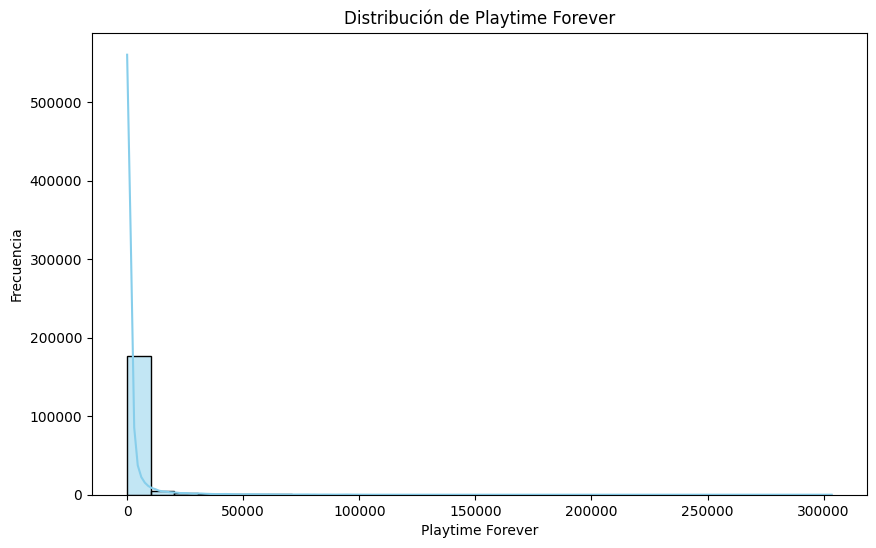

In [112]:
#Realizamos un histograma para verificar pare verificar sesgos

plt.figure(figsize=(10, 6))
sns.histplot(df_eda['playtime_forever'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Playtime Forever')
plt.xlabel('Playtime Forever')
plt.ylabel('Frecuencia')
plt.show()

In [113]:
#verificamos asimetria, al ser positiva notamos que hay un sesgo a la derecha, osea valores atipicos (extremadamente altos) que afectan la media

df_eda['playtime_forever'].skew()

10.222381959532072

In [114]:
#Con la kurtosis al ser un valor alto, comprobamos que existen valores extremos

df_eda['playtime_forever'].kurtosis()

153.80848991461514

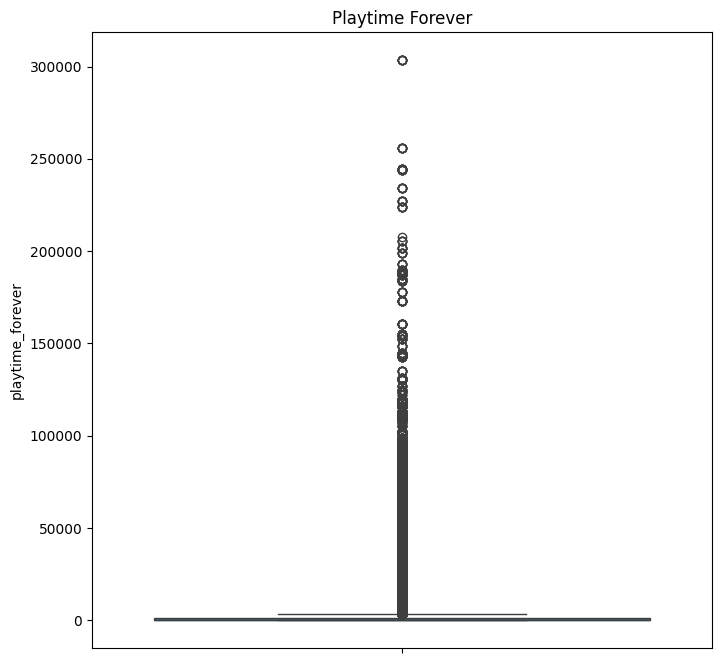

In [115]:
#Verificamos los outliers con un boxplot

plt.figure(figsize=(8, 8))
sns.boxplot(data=df_eda[ 'playtime_forever'])
plt.title('Playtime Forever')
plt.show()

In [ ]:
'''Podemos observar que tenemos valores atipicos o Outliers para la columna Playtime Forever, esto lo confirmamos con los valores de la asimetria
y la kurtosis, ademas al observar la desviacion estandar notamos que este valor es alto a comparacion de la media lo cual nos da una idea aproximada
de donde pueden estar iniciando los outliers de esta columna, y asi darnos una vision de que elementos podemos eliminar y asi no afectar el DataFrame
y poder tener un modelo de Machine learning mas preciso.'''

In [ ]:
#Eliminamos las horas de juego mayores a 7000 ya que es poco probable que alguien dedique tanto tiempo a un video juego en un lapso de 5 años.


In [116]:
clean_df=df_eda[df_eda['playtime_forever']<7000.0]

In [117]:
clean_df

,genres,app_name,price_x,item_id,developer,user_id,playtime_forever,recommend,sentiment_analysis
0,Action,Half-Life,9.99,70,Valve,DingarooEF,108.0,True,2
1,Action,Half-Life,9.99,70,Valve,DingarooEF,108.0,True,0
2,Action,Half-Life,9.99,70,Valve,DingarooEF,108.0,True,1
3,Action,Half-Life,9.99,70,Valve,76561197986552406,32.0,True,2
4,Action,Half-Life,9.99,70,Valve,76561197986552406,32.0,True,0
...,...,...,...,...,...,...,...,...,...
186498,Action,Counter-Strike: Condition Zero,9.99,80,Valve,pengwig,204.0,True,0
186499,Action,Counter-Strike: Condition Zero,9.99,80,Valve,76215167417936782,1.0,True,1
186500,Action,Counter-Strike: Condition Zero,9.99,80,Valve,76215167417936782,1.0,False,1
186501,Action,Counter-Strike: Condition Zero,9.99,80,Valve,76215167417936782,1.0,True,2


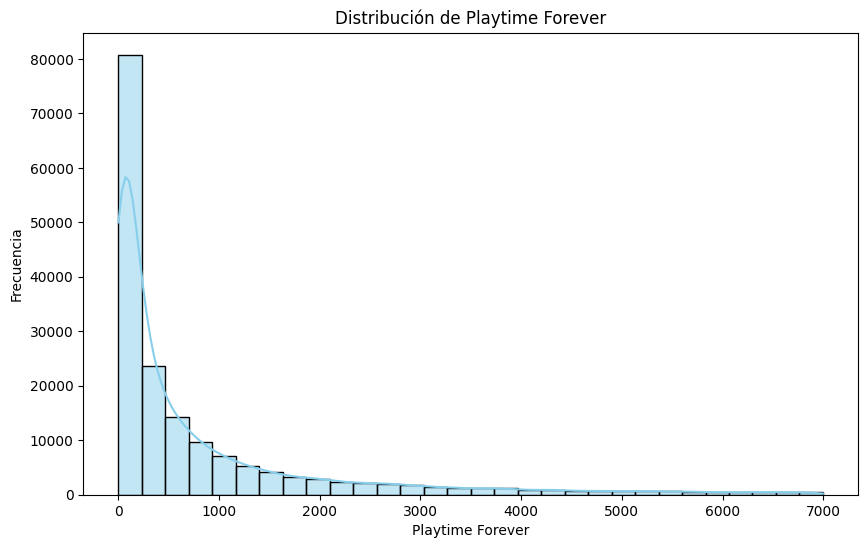

In [118]:
plt.figure(figsize=(10, 6))
sns.histplot(clean_df['playtime_forever'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Playtime Forever')
plt.xlabel('Playtime Forever')
plt.ylabel('Frecuencia')
plt.show()

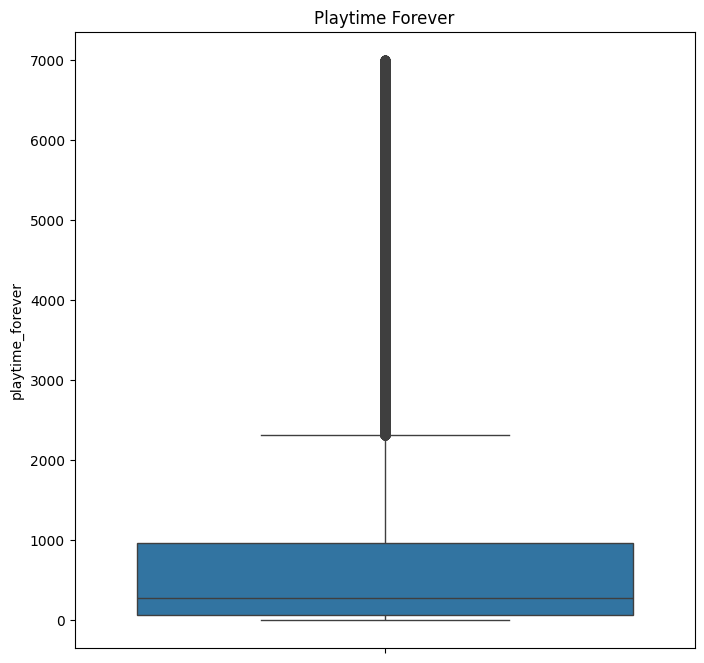

In [119]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=clean_df[ 'playtime_forever'])
plt.title('Playtime Forever')
plt.show()

In [120]:
#Guardo el dataset EDA
clean_df.to_csv('df_EDA.csv')